In [ ]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
import numpy as np

In [ ]:
def densidad(y):
  po=1.29     
  λ=7482.2            #m
  d=po*(np.e**(-y/λ))
  return d

No handles with labels found to put in legend.


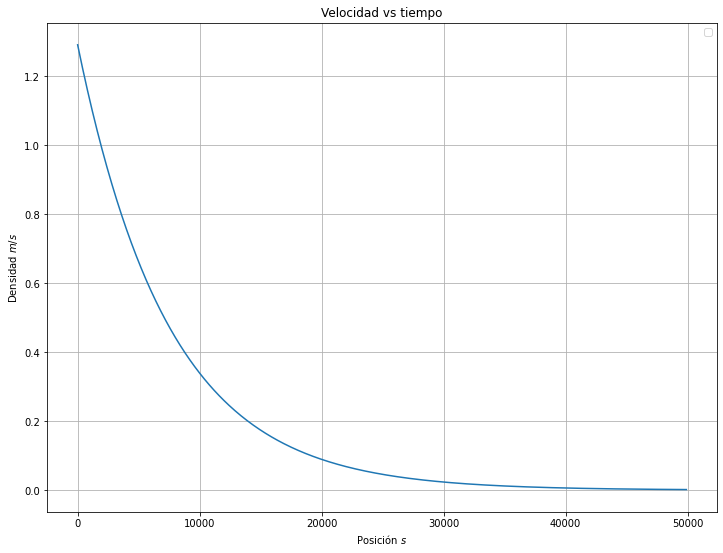

In [40]:

#grafica===========================================|
plt.figure(figsize=(12,9))
y=np.arange(0,50000,100)
plt.plot(y,densidad(y))
plt.title('Velocidad vs tiempo')
plt.xlabel('Posición $s$')
plt.ylabel('Densidad $m/s$')
plt.grid()
plt.legend()


In [ ]:

def paracaidista(X, t, params):
    m =  params[0]
    g =  params[1]
    k0 = params[2]
    λ =  params[3]
    
    dydt = X[1]
    dvdt =  -g +(k0/m)*(X[1]**2)*np.exp(-X[0]/λ) 
    return [dydt, dvdt]


In [ ]:
# Condiciones iniciales ===================================

v_0 = 0                       # velocidad inicial
x1 = np.array([30000, v_0]) 
x2 = np.array([40000, v_0]) 
x3 = np.array([50000, v_0]) 
x4 = np.array([60000, v_0]) 
x5 = np.array([70000, v_0])

In [ ]:
# Parámetros ========================================

m = 60      # Masa kg
g = 9.8     # N/m
A = 0.3     # m^2 
λ = 7482.2  # m
ρ0= 1.29    # kg/m^3
δ = 0.6     # coeficiente de rozamiento 

k0 = ρ0*A*δ/(2*m)

In [ ]:
params = [m, g, k0, λ]

t = np.linspace(0,300,1000)   # tiempo

#Solucion de la ecuacion diferencial para las diferentes condiocines iniciales

s1 = odeint(paracaidista, x1, t, args=(params, ) )  
s2 = odeint(paracaidista, x2, t, args=(params, ) )  
s3 = odeint(paracaidista, x3, t, args=(params, ) )  
s4 = odeint(paracaidista, x4, t, args=(params, ) )  
s5 = odeint(paracaidista, x5, t, args=(params, ) )  

p1 = s1[:,0] #posicion en el tiempo 
v1 = s1[:,1] #Velocidad en el tiempo 

p2 = s2[:,0] #posicion(t)
v2 = s2[:,1] #Velocidad(t)

p3 = s3[:,0] #posicion en el tiempo
v3 = s3[:,1] #Velocidad en el tiempo

p4 = s4[:,0] #posicion en el tiempo
v4 = s4[:,1] #Velocidad en el tiempo

p5 = s5[:,0] #posicion en el tiempo
v5 = s5[:,1] #Velocidad en el tiempo



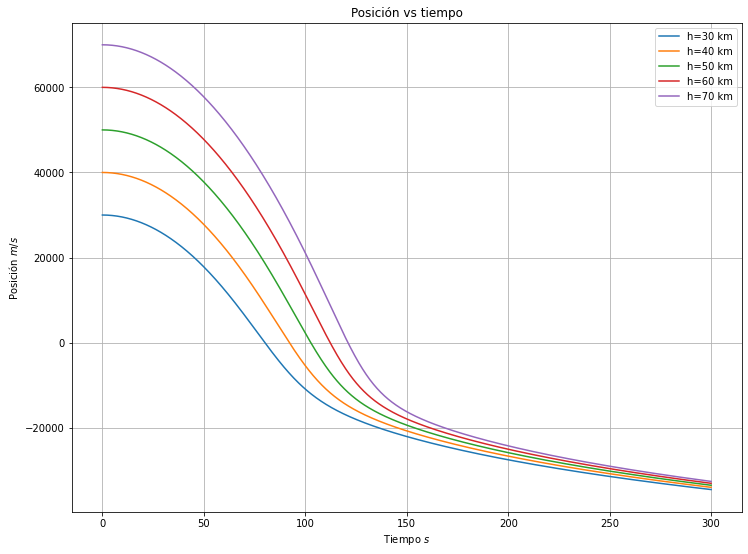

In [ ]:
#graficas====================================================================

plt.figure(figsize=(12,9))
plt.title('Posición vs tiempo')
plt.plot(t, p1,label='h=30 km')
plt.plot(t, p2,label='h=40 km')
plt.plot(t, p3,label='h=50 km')
plt.plot(t, p4,label='h=60 km')
plt.plot(t, p5,label='h=70 km')
plt.xlabel('Tiempo $s$')
plt.ylabel('Posición $m/s$')
plt.grid()
plt.legend()

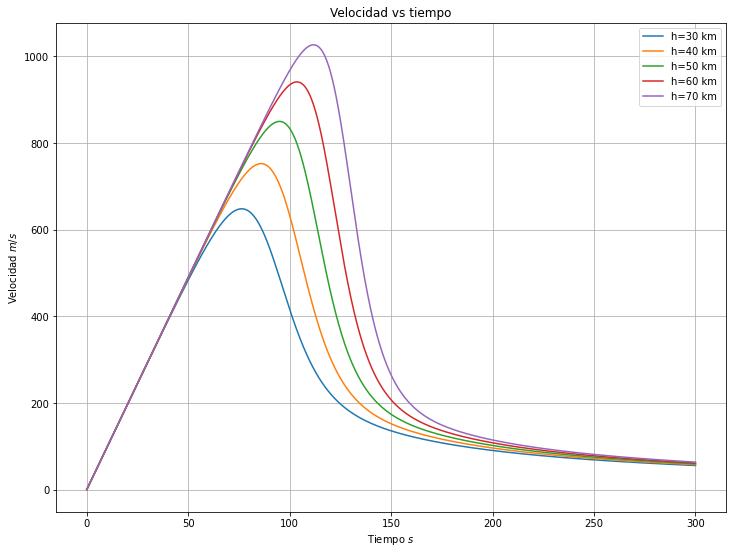

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Velocidad vs tiempo')
plt.plot(t, -v1,label='h=30 km')
plt.plot(t, -v2,label='h=40 km')
plt.plot(t, -v3,label='h=50 km')
plt.plot(t, -v4,label='h=60 km')
plt.plot(t, -v5,label='h=70 km')
plt.xlabel('Tiempo $s$')
plt.ylabel('Velocidad $m/s$')
plt.grid()
plt.legend()

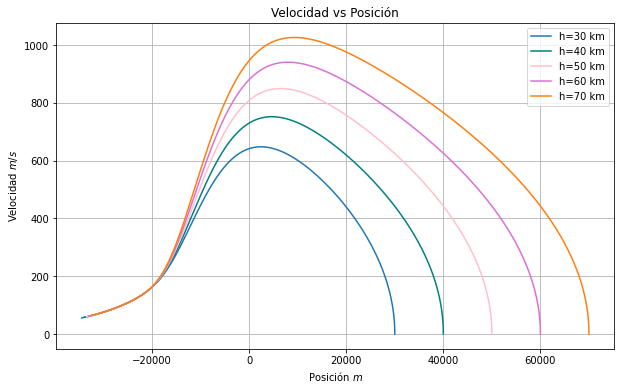

In [ ]:

plt.figure(figsize=(10,6))
plt.title('Velocidad vs Posición')
plt.plot(p1,-v1,label='h=30 km')
plt.plot(p2,-v2,label='h=40 km',color='teal')
plt.plot(p3,-v3,label='h=50 km',color='pink')
plt.plot(p4,-v4,label='h=60 km',color='orchid')
plt.plot(p5,-v5,label='h=70 km')
plt.xlabel('Posición $m$')
plt.ylabel('Velocidad $m/s$')
plt.grid()
plt.legend()

In [ ]:
from scipy.interpolate import CubicSpline
from scipy import  optimize

Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura

In [ ]:
f = CubicSpline(t,v1)
min = optimize.fmin_powell(f,0)
min

Optimization terminated successfully.
         Current function value: -647.957162
         Iterations: 2
         Function evaluations: 42


array(76.34672497)

Optimization terminated successfully.
         Current function value: -647.957162
         Iterations: 2
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -752.152271
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -849.592002
         Iterations: 2
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -940.769497
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -1026.387734
         Iterations: 2
         Function evaluations: 41

 ---------------------------- Resolución numérica ---------------------------- 

Velocidad límite cuando h = 30 km : 647.9571622891546 [m/s]
Velocidad límite cuando h = 40 km : 752.1522711562503 [m/s]
Velocidad límite cuando h = 50 km : 849.5920019010557 [m/s]
Velocidad límite cuando h = 60 km : 9

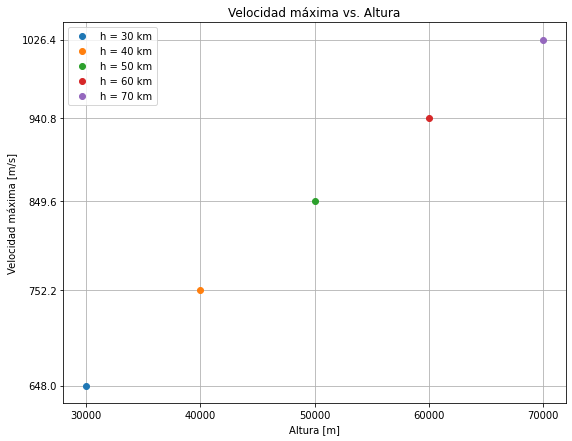

In [ ]:
#velocidad maxima numericamente 

def maximo(t, p, v):
  f = CubicSpline(t, v)                # Función velocidad (por debajo del eje x)
  min = optimize.fmin_powell(f,0)     # Tiempo de velocidad mínima para v
  tmax = abs(min)                     # Tiempo de velocidad máxima para -v (por encima del eje x)
  vmax = -f(tmax)                     # Velocidad máxima 

  yx = CubicSpline(t, p)              # Interpolamos la posición
  y_vm = yx(tmax)                     # Altura donde de alcanza la velocidad máxima

  return y_vm, vmax

# -------------------------------------------------

Ve = np.array([v1, v2, v3, v4, v5])     # Velocidades
Po = np.array([p1, p2, p3, p4, p5])     # Posiciones

Ym = np.zeros(5);
Vm = np.zeros(5);

for i in range(5):
  Ym[i], Vm[i] = maximo(t, Po[i], Ve[i])

print('\n ---------------------------- Resolución numérica ---------------------------- \n')

print('Velocidad límite cuando h = 30 km :', Vm[0], '[m/s]')
print('Velocidad límite cuando h = 40 km :', Vm[1], '[m/s]')
print('Velocidad límite cuando h = 50 km :', Vm[2], '[m/s]')
print('Velocidad límite cuando h = 60 km :', Vm[3], '[m/s]')
print('Velocidad límite cuando h = 70 km :', Vm[4], '[m/s]')
print()

plt.figure(figsize=(9, 7))
plt.title("Velocidad máxima vs. Altura")
plt.plot(30000, Vm[0], 'o', label="h = 30 km")
plt.plot(40000, Vm[1], 'o', label="h = 40 km")
plt.plot(50000, Vm[2], 'o', label="h = 50 km")
plt.plot(60000, Vm[3], 'o', label="h = 60 km")
plt.plot(70000, Vm[4], 'o', label="h = 70 km")
plt.xlabel('Altura [m]')
plt.ylabel('Velocidad máxima [m/s]')
plt.xticks([30000, 40000, 50000, 60000, 70000])
plt.yticks([Vm[0], Vm[1], Vm[2], Vm[3], Vm[4]])
plt.legend()
plt.grid()



Observamos que el paracaidista va incrementando su velocidad a medida que cae, alcanzando un máximo cuando su aceleración se vuelve nula, es decir, la aceleración decrementa a medida que comienza a caer el paracaidista. Esto es:

$\frac{dv}{dt} = 0 = -mg + k_0 v_m^2 * exp(\frac{-y_m}{\lambda})$

Donde $y_m$ corresponde a la altura a la que se alcanza la velocidad máxima. Lo anterior permite determinar lo siguiente:

$\frac{mg}{k_0} = v_l^2 = v_m^2 * exp(\frac{-y_m}{\lambda})$

Donde $v_l = \sqrt{\frac{mg}{k_0}}$ corresponde a la velocidad máxima que alcanzaría un paracaidista en una atmósfera uniforme.

Despejando $v_m$ tenemos:

$v_m = v_l * exp(\frac{y_m}{2\lambda})$

---------------------------- Resolución analítica ---------------------------- 

Velocidad límite cuando h = 30 km : 647.9572321134581 [m/s]
Velocidad límite cuando h = 40 km : 752.1517705167299 [m/s]
Velocidad límite cuando h = 50 km : 849.5913822026017 [m/s]
Velocidad límite cuando h = 60 km : 940.7694562923795 [m/s]
Velocidad límite cuando h = 70 km : 1026.3868653074253 [m/s]



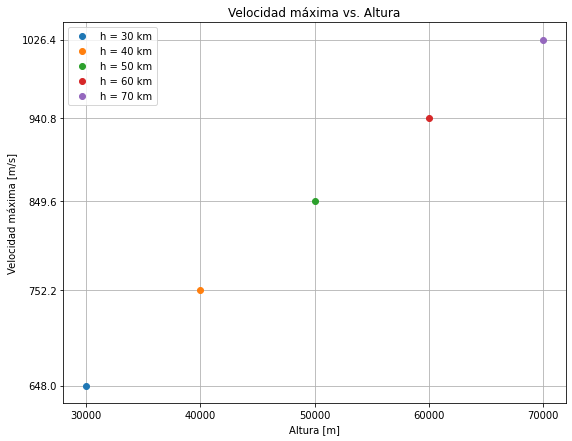

In [ ]:
''' =============================== Punto 4 =============================== '''

vl = (m*g/k0)**0.5
vma = vl*np.exp(Ym/(2*λ))

print('---------------------------- Resolución analítica ---------------------------- \n')

print('Velocidad límite cuando h = 30 km :', vma[0], '[m/s]')
print('Velocidad límite cuando h = 40 km :', vma[1], '[m/s]')
print('Velocidad límite cuando h = 50 km :', vma[2], '[m/s]')
print('Velocidad límite cuando h = 60 km :', vma[3], '[m/s]')
print('Velocidad límite cuando h = 70 km :', vma[4], '[m/s]')
print()

plt.figure(figsize=(9, 7))
plt.title("Velocidad máxima vs. Altura")
plt.plot(30000, vma[0], 'o', label="h = 30 km")
plt.plot(40000, vma[1], 'o', label="h = 40 km")
plt.plot(50000, vma[2], 'o', label="h = 50 km")
plt.plot(60000, vma[3], 'o', label="h = 60 km")
plt.plot(70000, vma[4], 'o', label="h = 70 km")
plt.xlabel('Altura [m]')
plt.ylabel('Velocidad máxima [m/s]')
plt.xticks([30000, 40000, 50000, 60000, 70000])
plt.yticks([vma[0], vma[1], vma[2], vma[3], vma[4]])
plt.legend()
plt.grid()